# Challenge-IA

## Import librerie e caricamento dataset

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Preprocessing dati e calcolo nuove feature

Avevo provato ad aggiungere ulteriori feature (come si vede nel codice commentato), raggruppando per fasce l'età e per la durata dell'attesa ma il miglioramento dell'accuracy era prossimo allo 0

In [3]:
# trasformazione delle date in un formato opportuno
train.ScheduledDay = train.ScheduledDay.apply(np.datetime64)
train.AppointmentDay = train.AppointmentDay.apply(np.datetime64)

# aggiunta di feature
train["WaitingDays"] = (train.AppointmentDay.dt.date - train.ScheduledDay.dt.date).dt.days
train["ScheduledHour"] = train.ScheduledDay.dt.hour
# train["ScheduledMonthDay"] = train.ScheduledDay.dt.day
# train["ScheduledMonth"] = train.ScheduledDay.dt.month
train["AppointmentWeekDay"] = train.AppointmentDay.dt.dayofweek
train["AppointmentMonthDay"] = train.AppointmentDay.dt.day
train["AppointmentMonth"] = train.AppointmentDay.dt.month

# trasformazione delle date in un formato opportuno
test.ScheduledDay = test.ScheduledDay.apply(np.datetime64)
test.AppointmentDay = test.AppointmentDay.apply(np.datetime64)

# aggiunta di feature
test["WaitingDays"] = (test.AppointmentDay.dt.date - test.ScheduledDay.dt.date).dt.days
test["ScheduledHour"] = test.ScheduledDay.dt.hour
# test["ScheduledMonthDay"] = test.ScheduledDay.dt.day
# test["ScheduledMonth"] = test.ScheduledDay.dt.month
test["AppointmentWeekDay"] = test.AppointmentDay.dt.dayofweek
test["AppointmentMonthDay"] = test.AppointmentDay.dt.day
test["AppointmentMonth"] = test.AppointmentDay.dt.month

# bins= [0,4,13,20,40,60,110]
# labels = ['Infant','Kid','Teen','Adult',"Senior","Old"]
# train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
# train['AgeGroup'] = train['AgeGroup'].cat.add_categories('unknown').fillna('unknown')
# test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)
# test['AgeGroup'] = test['AgeGroup'].cat.add_categories('unknown').fillna('unknown')

# bins= [0,7,15,30,90,180,365,500]
# labels = ['SameDay','Week','TwoWeeks','Month','ThreeMonths',"HalfYear","MoreThanOneYear"]
# train['WaitingGroup'] = pd.cut(train['WaitingDays'], bins=bins, labels=labels, right=False)
# train['WaitingGroup'] = train['WaitingGroup'].cat.add_categories('unknown').fillna('unknown')
# test['WaitingGroup'] = pd.cut(test['WaitingDays'], bins=bins, labels=labels, right=False)
# test['WaitingGroup'] = test['WaitingGroup'].cat.add_categories('unknown').fillna('unknown')

# rimuovo l'orario dalle due featuers temporali (non più necessario perchè vengono droppate successivamente le colonne)
# train.AppointmentDay = train.AppointmentDay.dt.date
# train.ScheduledDay = train.ScheduledDay.dt.date
# test.AppointmentDay = test.AppointmentDay.dt.date
# test.ScheduledDay = test.ScheduledDay.dt.date

Ho deciso di rimuoverer la feature Neighbourhood poichè il dataset di train non è abbastanza rappresentativo e quindi per poter eseguire un encoding avrei necessità di utilizzare i dati del test set (e quindi dovrei fare fit anche su dati del test set).

In [4]:
# divido le colonne in insiemi
target_col = ["No-show"]
drop_cols = ["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay", "Neighbourhood"]
cat_cols = train.nunique()[train.nunique() <= 5].keys().tolist()
num_cols = [c for c in train.columns if c not in target_col + drop_cols + cat_cols]

## Exploratory Data Analysis

Text(0.5, 1.0, 'No-show')

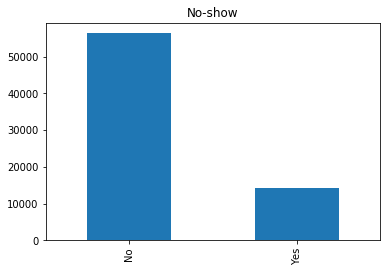

In [5]:
train["No-show"].value_counts().plot(kind='bar').set_title('No-show')

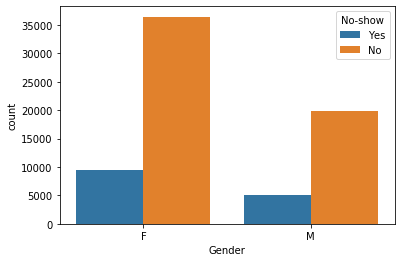

In [6]:
ax = sns.countplot(x="Gender", hue="No-show", data=train)

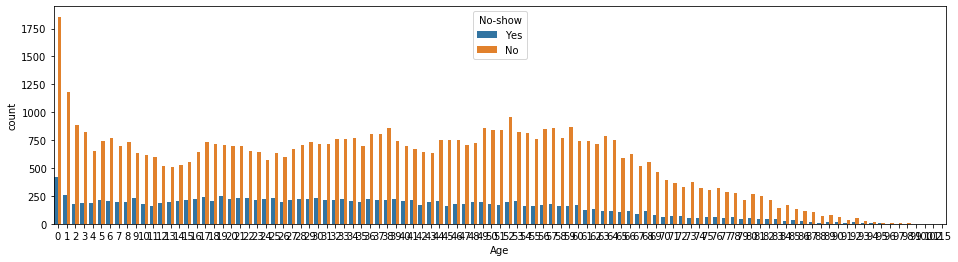

In [7]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x="Age", hue="No-show", data=train)

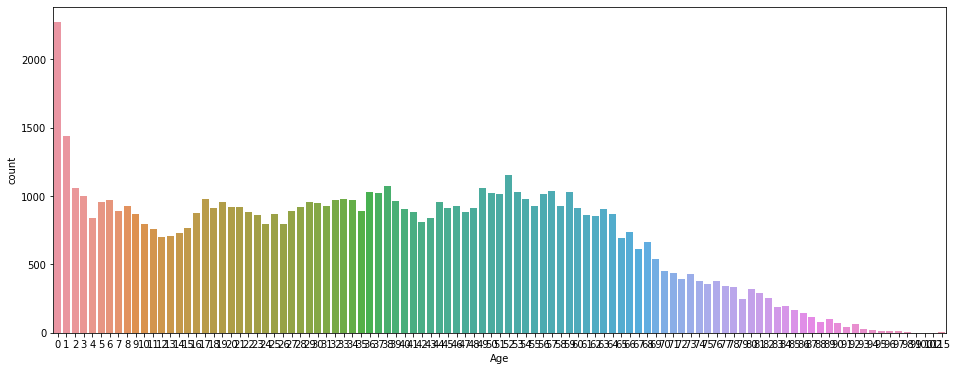

In [8]:
plt.figure(figsize=(16,6))
chart = sns.countplot(train.Age)

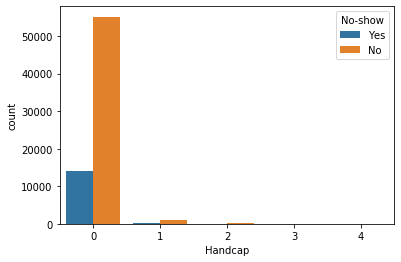

In [9]:
ax = sns.countplot(x="Handcap", hue="No-show", data=train)

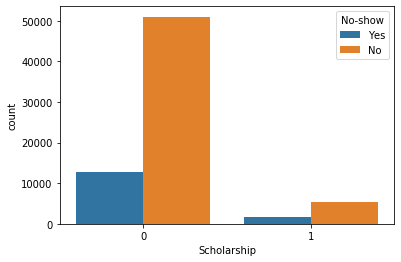

In [10]:
ax = sns.countplot(x="Scholarship", hue="No-show", data=train)

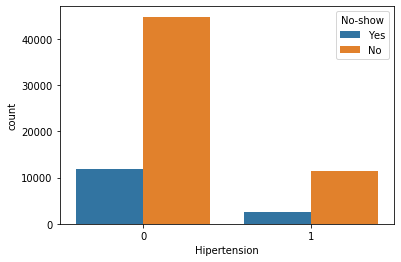

In [11]:
ax = sns.countplot(x="Hipertension", hue="No-show", data=train)

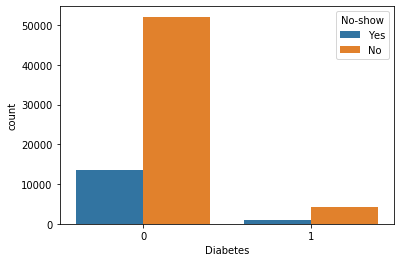

In [12]:
ax = sns.countplot(x="Diabetes", hue="No-show", data=train)

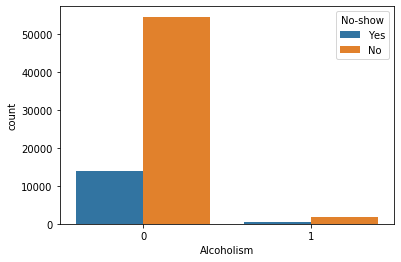

In [13]:
ax = sns.countplot(x="Alcoholism", hue="No-show", data=train)

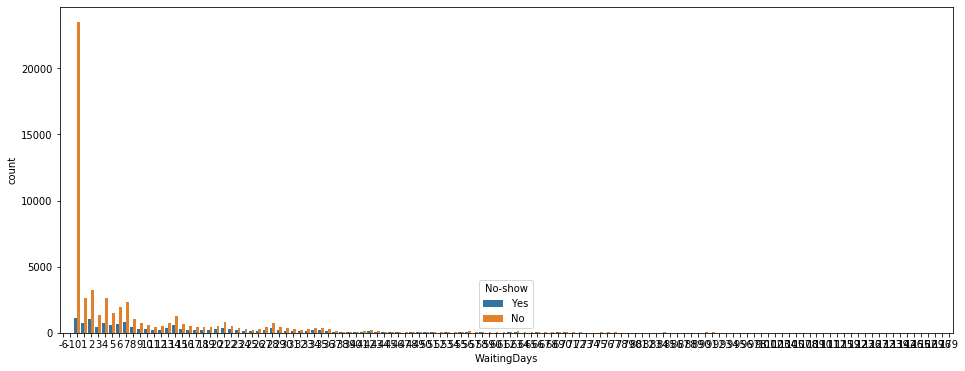

In [14]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x="WaitingDays", hue="No-show", data=train)

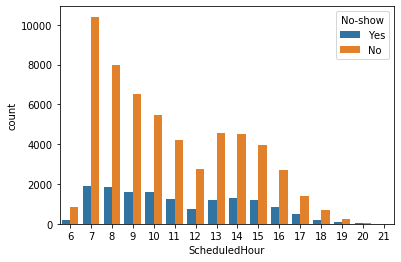

In [15]:
ax = sns.countplot(x="ScheduledHour", hue="No-show", data=train)

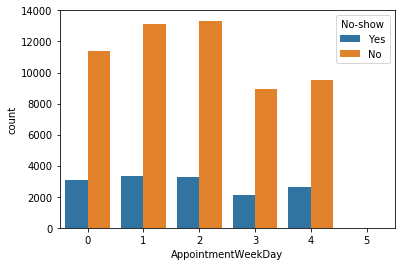

In [16]:
ax = sns.countplot(x="AppointmentWeekDay", hue="No-show", data=train)

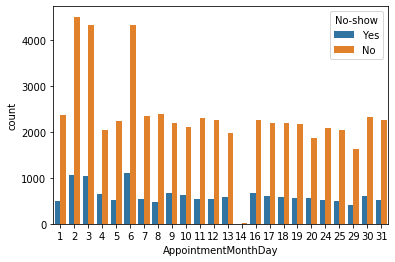

In [17]:
ax = sns.countplot(x="AppointmentMonthDay", hue="No-show", data=train)

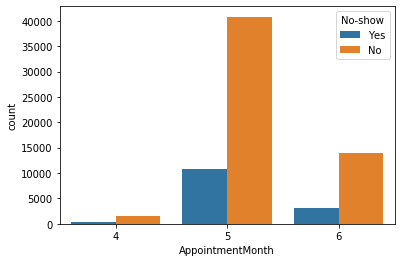

In [18]:
ax = sns.countplot(x="AppointmentMonth", hue="No-show", data=train)

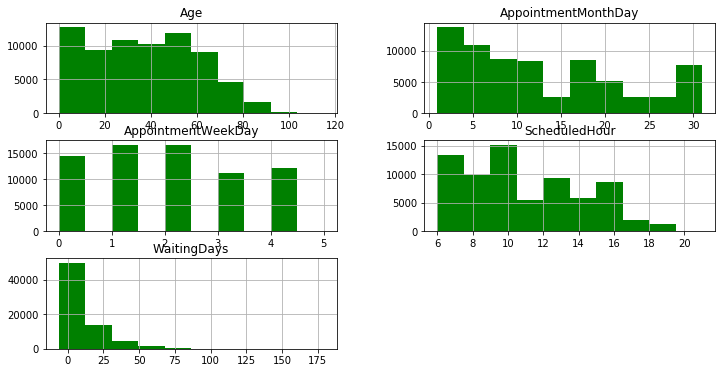

In [19]:
hist = train.hist(num_cols, histtype="bar", color="green", figsize=(12,6))

## Mapping ed Encoding

Non ho messo uno StandardScaler (codice commentato) perchè il miglioramento al modello era prossimo allo 0

In [20]:
train[target_col] = train["No-show"].map({"Yes":1,"No":0})
test[target_col] = test["No-show"].map({"Yes":1,"No":0})

# scaler = StandardScaler()
# col_names = ['WaitingDays']
# scaled_features = train[col_names].copy()
# features = scaled_features[col_names]
# scaler.fit(features.values)
# features = scaler.transform(features.values)
# scaled_features[col_names] = features
# train.WaitingDays = scaled_features.WaitingDays

# scaled_features = test[col_names].copy()
# features = scaled_features[col_names]
# features = scaler.transform(features.values)
# scaled_features[col_names] = features
# test.WaitingDays = scaled_features.WaitingDays

# faccio l'encoding delle colonne categoriche (quelle con le label già numeriche non vengono alterate)
le = LabelEncoder()
for c in ["Gender"] :
    train[c] = le.fit_transform(train[c])
    test[c] = le.transform(test[c])

Text(0.5, 1, 'Correlation between features')

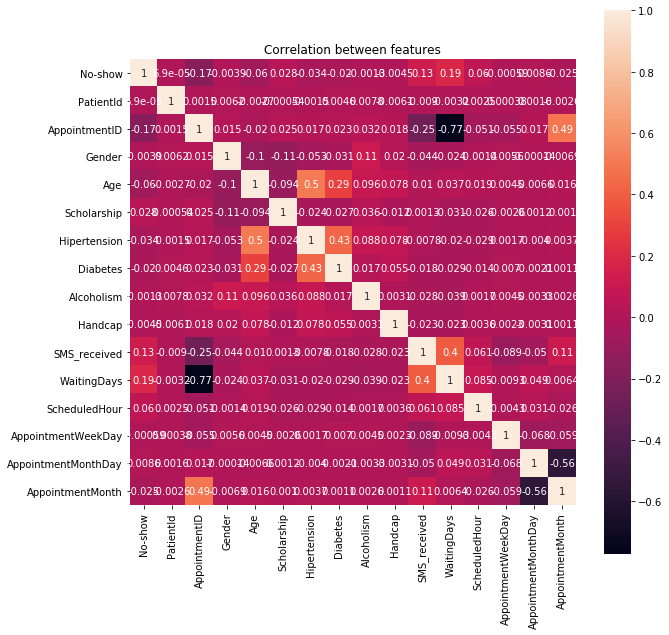

In [21]:
#heatmap
correlation = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.title("Correlation between features")

In [22]:
train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

y_train = train[target_col]
y_test = test[target_col]
x_train = train.loc[:, train.columns != "No-show"]
x_test = test.loc[:, test.columns != "No-show"]

print("train", train.shape)
print("test", test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
print("x_train", x_train.shape)
print("x_test", x_test.shape)

train (70736, 14)
test (17685, 14)
y_train (70736, 1)
y_test (17685, 1)
x_train (70736, 13)
x_test (17685, 13)


## Confronto tra diversi modelli e diversi parametri

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

for c in [0.001,0.01,0.1,1,10,100,1000]:
    logreg = LogisticRegression(C=c, random_state=0)
    logreg.fit(x_train, y_train)
    print("Parametro C:", c)
    print("Accuracy on training set: {:.8f}".format(logreg.score(x_train, y_train)))
    print("Accuracy on test set: {:.8f}".format(logreg.score(x_test, y_test)))

C:\Users\Marco\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Marco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Marco\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

Parametro C: 0.001
Accuracy on training set: 0.79208607
Accuracy on test set: 0.79819056


C:\Users\Marco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Marco\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parametro C: 0.01
Accuracy on training set: 0.79215675
Accuracy on test set: 0.79847328


C:\Users\Marco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Marco\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parametro C: 0.1
Accuracy on training set: 0.79210020
Accuracy on test set: 0.79841674


C:\Users\Marco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Marco\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parametro C: 1
Accuracy on training set: 0.79224157
Accuracy on test set: 0.79858637


C:\Users\Marco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Marco\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parametro C: 10
Accuracy on training set: 0.79229812
Accuracy on test set: 0.79847328


C:\Users\Marco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Marco\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parametro C: 100
Accuracy on training set: 0.79205779
Accuracy on test set: 0.79847328
Parametro C: 1000
Accuracy on training set: 0.79221330
Accuracy on test set: 0.79864292


C:\Users\Marco\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### KNeighbors (più lento degli altri)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(1,6):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train, y_train)
    print("Neighbors:", n)
    print("Accuracy on training set: {:.8f}".format(clf.score(x_train, y_train)))
    print("Accuracy on test set: {:.8f}".format(clf.score(x_test, y_test)))

C:\Users\Marco\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Neighbors: 1
Accuracy on training set: 0.98699389
Accuracy on test set: 0.73276788


C:\Users\Marco\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Neighbors: 2
Accuracy on training set: 0.86285625
Accuracy on test set: 0.78518519


C:\Users\Marco\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Neighbors: 3
Accuracy on training set: 0.86315313
Accuracy on test set: 0.76002262


C:\Users\Marco\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Neighbors: 4


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,16):
    tree = DecisionTreeClassifier(max_depth=i,random_state=0)
    tree.fit(x_train, y_train)
    print("Max_depth:", i)
    print("Accuracy on training set: {:.8f}".format(tree.score(x_train, y_train)))
    print("Accuracy on test set: {:.8f}".format(tree.score(x_test, y_test)))

## Modello della soluzione

In [ ]:
model = DecisionTreeClassifier(max_depth=9,random_state=0)
model.fit(x_train, y_train)
print("Accuracy on training set: {:.8f}".format(model.score(x_train, y_train)))
print("Accuracy on test set: {:.8f}".format(model.score(x_test, y_test)))